In [3]:
import pandas as pd
import plotly as py
from plotly import express as px
import matplotlib.pyplot as plt

degree_gender_ratio = pd.read_csv('data/percent-degrees-conferred-women-usa.csv')

degree_gender_ratio.head()


c:\Users\Utente\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Utente\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Utente\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


modified exercise sent by student. Need to change colormap
We can reshape the dataframe to be able to use color by category!

In [13]:

fig_original = px.line(degree_gender_ratio, x='Year', y=[x for x in degree_gender_ratio.columns[1:]],color_discrete_sequence=px.colors.qualitative.Alphabet)
fig_original.update_layout(legend = dict(title='<b> Major </b>', font = dict(size = 8, color = "black")))

fig_original.show()


In [14]:
df_melt = degree_gender_ratio.melt(id_vars='Year', var_name="Major", value_name='value', value_vars=[x for x in degree_gender_ratio.columns[1:]])
df_melt.head()

,Year,Major,value
0,1970,Agriculture,4.229798
1,1971,Agriculture,5.452797
2,1972,Agriculture,7.420710
3,1973,Agriculture,9.653602
4,1974,Agriculture,14.074623


In [6]:
fig = px.line(df_melt, x='Year', y='value',color="Major",color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(title='hiding variations', yaxis=dict(range=[-50, 120]))
fig.show()

changing aspect ratio

In [18]:
fig_enhanced =  px.line(degree_gender_ratio, x='Year', y=[x for x in degree_gender_ratio.columns[1:]],color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_enhanced.update_layout(legend = dict(font = dict(size = 8, color = "black")),
                  legend_title = dict(font = dict(size = 10)))

fig_enhanced.update_layout(
    width = 400,
    height = 800,
    title = "enhancing by changing figure size"
)
fig_enhanced.update_yaxes(
    scaleanchor = "x",
    scaleratio = 2,
  )
fig_enhanced.show()

In [21]:
fig_hide = px.line(degree_gender_ratio, x='Year', y=[x for x in degree_gender_ratio.columns[1:]],color_discrete_sequence=px.colors.qualitative.Alphabet)
fig_hide.update_layout(legend = dict(font = dict(size = 8, color = "black")),
                  legend_title = dict(font = dict(size = 10)))


fig_hide.update_layout(
    height = 300,
    title = "enhancing by changing figure size"
)

fig_hide.show()

small multiples (matplotlib). Note the y-axis scaling!

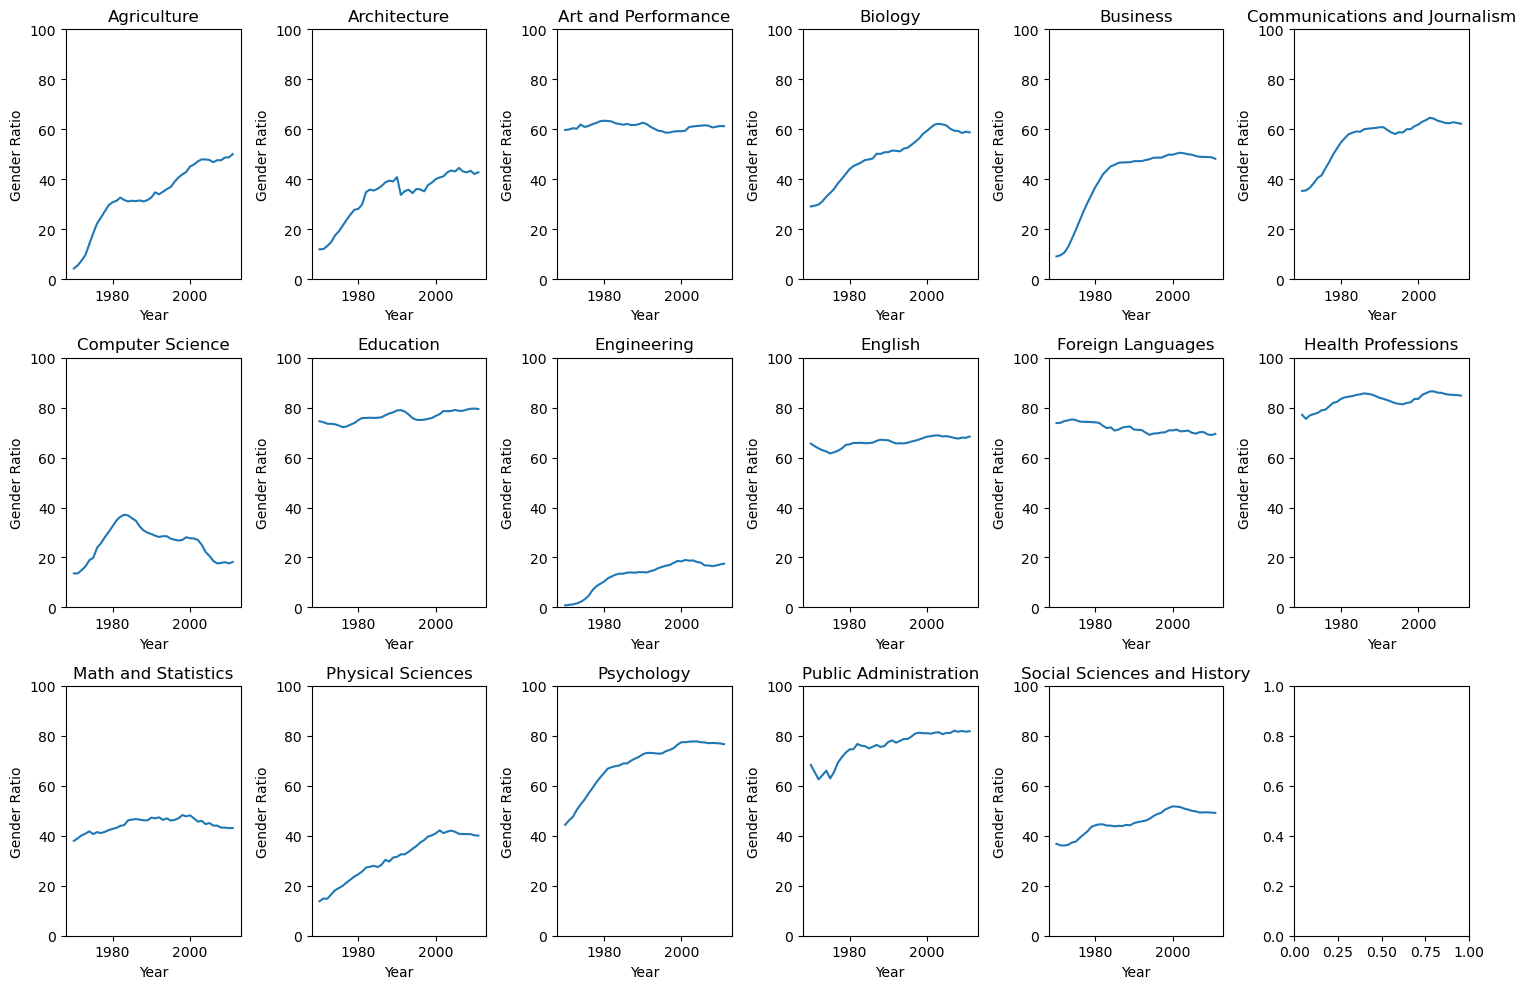

In [22]:
majors = degree_gender_ratio.columns[1:]
fig, axs = plt.subplots(3, 6, figsize=(15,10))

axs = axs.flatten()

for i, major in enumerate(majors):
    axs[i].plot(degree_gender_ratio['Year'], degree_gender_ratio[major])
    axs[i].set_title(major)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Gender Ratio')
    axs[i].set_ylim([0, 100])
plt.tight_layout()
plt.show()


In [23]:
# In plotly, reshaping the array

df_melt = degree_gender_ratio.melt(id_vars='Year', var_name="Major", value_name='value', value_vars=[x for x in degree_gender_ratio.columns[1:]])
fig=px.line(df_melt, x='Year', y='value',facet_col="Major",facet_col_wrap = 3, color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(
    font_size=8
)

Gender ratios of business, engineering, biology, health professions majors in 1970, 1990, and 2010
Look at the dataframe! How can we get the gender ratios male/female?

In [11]:
selected_columns = ['Year','Business','Engineering','Biology','Health Professions']
selected_years = [1970, 1990, 2010]


selected_data = degree_gender_ratio.loc[degree_gender_ratio['Year'].isin(selected_years), selected_columns]
df = selected_data.melt(id_vars='Year', var_name="Major", value_name='female', value_vars=[x for x in selected_data.columns[1:]])
df.insert(3, "male", 100-df["female"])
# Print the selected data

df2 = df.melt(id_vars=['Year','Major'], var_name="Gender", value_name='val', value_vars=[x for x in df.columns[2:]])
print(df2 )
fig=px.pie(df2, names='Gender',values='val', facet_col="Major",facet_row="Year", color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    font_size=8
)


    Year               Major  Gender        val
0   1970            Business  female   9.064439
1   1990            Business  female  47.200851
2   2010            Business  female  48.757988
3   1970         Engineering  female   0.800000
4   1990         Engineering  female  14.100000
5   2010         Engineering  female  17.200000
6   1970             Biology  female  29.088363
7   1990             Biology  female  50.818094
8   2010             Biology  female  59.010255
9   1970  Health Professions  female  77.100000
10  1990  Health Professions  female  83.900000
11  2010  Health Professions  female  85.000000
12  1970            Business    male  90.935561
13  1990            Business    male  52.799149
14  2010            Business    male  51.242012
15  1970         Engineering    male  99.200000
16  1990         Engineering    male  85.900000
17  2010         Engineering    male  82.800000
18  1970             Biology    male  70.911637
19  1990             Biology    male  49